In [140]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

In [51]:
cases=pd.read_csv('cases.csv')
cases.head()

,Subject,Account Tier,Priority,Case Owner,Case Number,Date/Time Closed,Date/Time Opened,Date/Time Resolved,Age (Days),Open,Closed,Account Name
0,"revenueAdd(6713) failing with ""Error: java.lan...",Premium,4,Daisy Vincent,267737.0,1/6/2016 1:47 PM,1/4/2016 12:07 AM,1/6/2016 1:47 PM,3.0,0.0,1.0,Citroen UK
1,Deleting bidding folders for over 7 days,NaN,4,Alexander Ulrich,267746.0,NaN,1/4/2016 7:17 AM,1/4/2016 11:11 AM,240.0,1.0,0.0,NaN
2,Fwd: Marin | GA Auto tagging,Premium,4,Mickael Pineau,267748.0,1/5/2016 4:42 PM,1/4/2016 8:21 AM,1/5/2016 4:42 PM,1.0,0.0,1.0,Ocean Park
3,Revenus manquants 03/01/2016,Premium,5,Mickael Pineau,267751.0,1/6/2016 11:57 AM,1/4/2016 9:05 AM,1/6/2016 11:57 AM,2.0,0.0,1.0,LeGuide.com FR
4,Bulk Smart Sync request,Premium,5,Sean Higgins,267752.0,1/14/2016 4:32 PM,1/4/2016 9:36 AM,1/14/2016 4:32 PM,10.0,0.0,1.0,Hotels.com


In [4]:
cases.dtypes

Subject                object
Account Tier           object
Priority               object
Case Owner             object
Case Number           float64
Date/Time Closed       object
Date/Time Opened       object
Date/Time Resolved     object
Age (Days)            float64
Open                  float64
Closed                float64
Account Name           object
dtype: object

In [50]:
%timeit pd.to_datetime(cases['Date/Time Opened'],infer_datetime_format=True)

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 64.9 µs per loop


In [53]:
cases['Date/Time Opened']=pd.to_datetime(cases['Date/Time Opened'],infer_datetime_format=True)
cases['Date/Time Opened']

0      2016-01-04 00:07:00
1      2016-01-04 07:17:00
2      2016-01-04 08:21:00
3      2016-01-04 09:05:00
4      2016-01-04 09:36:00
5      2016-01-04 09:54:00
6      2016-01-04 09:59:00
7      2016-01-04 10:05:00
8      2016-01-04 10:51:00
9      2016-01-04 10:53:00
10     2016-01-04 12:20:00
11     2016-01-04 12:23:00
12     2016-01-04 12:40:00
13     2016-01-04 12:40:00
14     2016-01-04 12:53:00
15     2016-01-04 13:26:00
16     2016-01-04 13:33:00
17     2016-01-04 13:48:00
18     2016-01-04 14:14:00
19     2016-01-04 14:41:00
20     2016-01-04 15:07:00
21     2016-01-04 15:49:00
22     2016-01-04 15:50:00
23     2016-01-04 15:57:00
24     2016-01-04 15:59:00
25     2016-01-04 16:10:00
26     2016-01-04 16:41:00
27     2016-01-04 17:02:00
28     2016-01-04 17:17:00
29     2016-01-05 08:39:00
               ...        
5547   2016-08-30 14:37:00
5548   2016-08-30 16:54:00
5549   2016-08-30 17:08:00
5550   2016-08-30 18:31:00
5551   2016-08-30 20:00:00
5552   2016-08-31 00:15:00
5

In [86]:
monthly_view = cases.groupby([cases['Date/Time Opened'].dt.month, cases['Account Tier']]).count()
monthly_view.head()


Subject  Priority  Case Owner  Case Number  \
Date/Time Opened Account Tier                                                  
1.0              Advanced              93        10          93           93   
                 Enterprise Lite        1         0           1            1   
                 Premium              181        23         181          181   
                 Pro                   22         1          22           22   
                 Pro Platinum          12         1          12           12   

                                  Date/Time Closed  Date/Time Opened  \
Date/Time Opened Account Tier                                          
1.0              Advanced                       51                93   
                 Enterprise Lite                 0                 1   
                 Premium                       116               181   
                 Pro                            10                22   
                 Pro Platinum                    8                12   

                                  Date/Time Resolved  Age (Days)  Open  \
Date/Time Opened Account Tier                                            
1.0              Advanced                         91          93    93   
                 Enterprise Lite                   1           1     1   
                 Premium                         178         181   181   
                 Pro                              22          22    22   
                 Pro Platinum                     12          12    12   

                                  Closed  Account Name  
Date/Time Opened Account Tier                           
1.0              Advanced             93            93  
                 Enterprise Lite       1             1  
                 Premium             181           181  
                 Pro                  22            22  
                 Pro Platinum         12            12

In [124]:
myteam = ('Sean Higgins','Mickael Pineau')
owner_view = cases.groupby(cases['Case Owner'])
filtered_view = owner_view.apply(lambda g: g[g['Case Owner'] == 'Sean Higgins'])

In [127]:
ownermonth = filtered_view.groupby([filtered_view['Date/Time Opened'].dt.month,filtered_view['Case Owner'],filtered_view['Account Tier']]).count()
ownermonth

Subject  Priority  Case Number  \
Date/Time Opened Case Owner   Account Tier                                      
1                Sean Higgins Advanced              15         2           15   
                              Premium               32         7           32   
                              Pro                    5         0            5   
                              Pro Platinum           1         0            1   
                              Standard              21         3           21   
2                Sean Higgins Advanced              16         0           16   
                              Premium               61         3           61   
                              Pro                    3         0            3   
                              Pro Platinum           2         0            2   
                              Standard              28         5           28   
3                Sean Higgins Advanced              24         0           24   
                              Premium               55         3           55   
                              Pro                   10         1           10   
                              Pro Platinum           1         0            1   
                              Standard              41         2           41   
4                Sean Higgins Advanced              10         0           10   
                              Premium               53         4           53   
                              Pro                    2         0            2   
                              Pro Platinum           3         0            3   
                              Standard              24         2           24   
5                Sean Higgins Advanced              15         0           15   
                              Enterprise Lite        1         0            1   
                              Premium               36         0           36   
                              Pro                    5         0            5   
                              Standard              14         0           14   
6                Sean Higgins Advanced              16         0           16   
                              Enterprise Lite        1         0            1   
                              Premium               38         1           38   
                              Pro                    3         0            3   
                              Pro Platinum           3         0            3   
                              Standard              23         0           23   
7                Sean Higgins Advanced               7         0            7   
                              Enterprise Lite        1         0            1   
                              Premium               23         3           23   
                              Pro                    6         0            6   
                              Pro Platinum           3         0            3   
                              Standard              26         2           26   
8                Sean Higgins Advanced               2         0            2   
                              Premium               13         0           13   
                              Pro                    3         0            3   
                              Standard               5         1            5   

                                               Date/Time Closed  \
Date/Time Opened Case Owner   Account Tier                        
1                Sean Higgins Advanced                        8   
                              Premium                        20   
                              Pro                             3   
                              Pro Platinum                    0   
                              Standard                       13   
2                Sean Higgins Advanced                       12   
                           

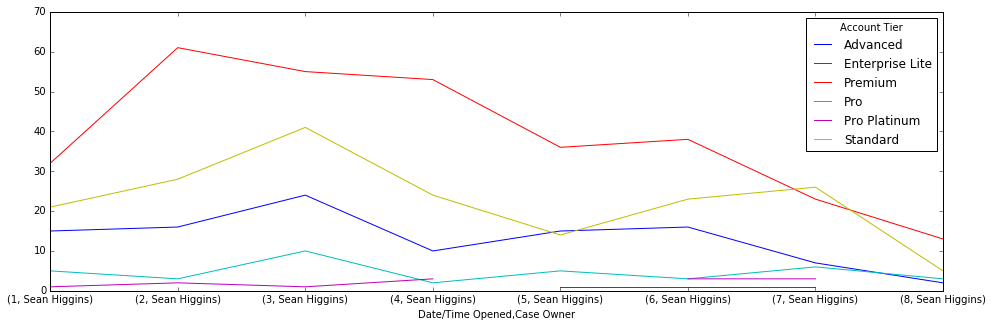

In [145]:
unstackedowner = ownermonth['Date/Time Opened'].unstack()
unstackedowner.plot.line(figsize=(16,5))
p.show()

In [120]:
owner_monthly_view = cases.groupby([cases['Date/Time Opened'].dt.month,cases['Case Owner']]).count()
owner_monthly_view

Subject  Account Tier  Priority  \
Date/Time Opened Case Owner                                               
1.0              Alex Dixon                   2             2         0   
                 Alexander Ulrich            31            28         9   
                 Anne Schoberth               2             2         0   
                 Barbara Elley                1             1         0   
                 Benedicte Teyssandier       54            48         3   
                 Daisy Vincent                1             1         1   
                 Dariusz Pawlak               6             4         0   
                 Darren Southey               1             1         0   
                 Eu Wen Teh                   1             1         0   
                 Greg Ler                    69            63         6   
                 Joe Southin                  1             1         0   
                 Karim Bentahar               1             1         0   
                 Lucie Ataya                  2             2         1   
                 Mickael Pineau             107            95        12   
                 Oli Clary                   99            87        13   
                 Peter Simmonds               1             0         1   
                 Ryan Storrar                 1             1         0   
                 Sean Higgins                80            74        12   
                 Simona Serena                2             2         0   
                 Sophie Wassermann            1             1         0   
                 Valentin Palussière          5             5         0   
                 William Hartley-Booth        1             0         1   
2.0              Alex Dixon                   1             1         0   
                 Alexander Ulrich            34            28         0   
                 Alina Asiminii               1             1         0   
                 Andreana Huang               1             1         0   
                 Anne Schoberth               1             1         0   
                 Barbara Elley                2             2         0   
                 Benedicte Teyssandier      122           108         0   
                 Darren Southey               1             1         0   
...                                         ...           ...       ...   
7.0              Greg Ler                    85            80         5   
                 Justyna Schueler            80            65        29   
                 Karim Bentahar               4             4         0   
                 Mickael Pineau              24            22         0   
                 Nancy Weber                  1             1         0   
                 Noemie Clavaressa            1             1         0   
                 Oli Clary                    4             4         1   
                 Pierre Saab                 96            84        26   
                 Rajendran Kovilpillai        1             0         0   
                 Remy Villeneuve            137           112       137   
                 Ryan O'Malley               32            26         4   
                 Sean Higgins                69            66         6   
8.0              Alexander Ulrich            26            23         0   
                 Alexandre Guichet           84            57        84   
                 Anne Schoberth               2             2         0   
                 Barbara Elley               10            10         0   
                 Fabien Lavaud               56            51         0   
                 Greg Ler                    99            80         3   
                 Grégory Pantaine             1             1         1   
                 Justyna Schueler           111            97        28   
                 Karim Bentahar               3             3    

In [138]:
monthly_view.index.names=['Month','Tier']
monthly_view.head()

Subject  Priority  Case Owner  Case Number  \
Month Tier                                                          
1.0   Advanced              93        10          93           93   
      Enterprise Lite        1         0           1            1   
      Premium              181        23         181          181   
      Pro                   22         1          22           22   
      Pro Platinum          12         1          12           12   

                       Date/Time Closed  Date/Time Opened  Date/Time Resolved  \
Month Tier                                                                      
1.0   Advanced                       51                93                  91   
      Enterprise Lite                 0                 1                   1   
      Premium                       116               181                 178   
      Pro                            10                22                  22   
      Pro Platinum                    8                12                  12   

                       Age (Days)  Open  Closed  Account Name  
Month Tier                                                     
1.0   Advanced                 93    93      93            93  
      Enterprise Lite           1     1       1             1  
      Premium                 181   181     181           181  
      Pro                      22    22      22            22  
      Pro Platinum             12    12      12            12

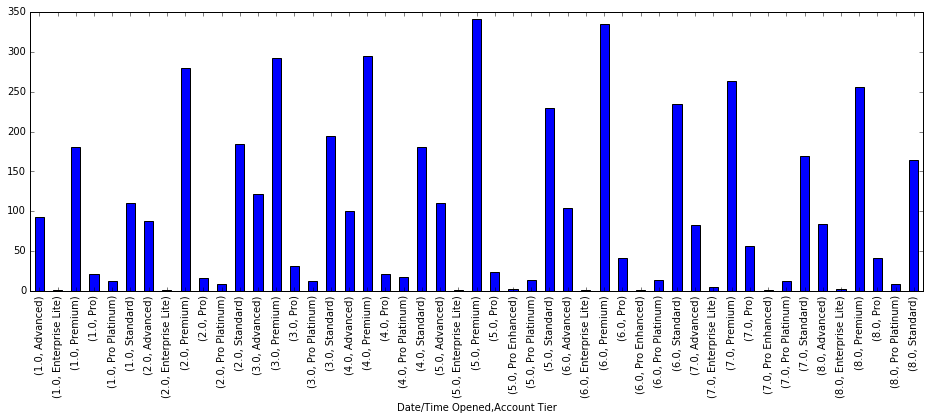

In [137]:
monthly_view['Date/Time Opened'].plot.bar(figsize=(16,5))
p.show()

In [136]:
unstacked_view = monthly_view['Date/Time Opened'].unstack()
unstacked_view

Account Tier,Advanced,Enterprise Lite,Premium,Pro,Pro Enhanced,Pro Platinum,Standard
Date/Time Opened,,,,,,,
1.0,93.0,1.0,181.0,22.0,NaN,12.0,111.0
2.0,88.0,1.0,280.0,16.0,NaN,9.0,185.0
3.0,122.0,NaN,292.0,32.0,NaN,13.0,194.0
4.0,101.0,NaN,295.0,22.0,NaN,17.0,181.0
5.0,111.0,1.0,341.0,24.0,2.0,14.0,230.0
6.0,104.0,1.0,335.0,42.0,1.0,14.0,235.0
7.0,83.0,5.0,264.0,56.0,1.0,12.0,169.0
8.0,84.0,2.0,256.0,41.0,NaN,9.0,164.0


In [141]:
p.style.use('bmh')
unstacked_view.plot.bar(figsize=(16,5))
p.show()

AttributeError: 'str' object has no attribute 'use'